# Parametric Tests

#### The Kolmogorov-Smirnov test focuses more on the centrality of the data. Consequently, however, the test has less power if there is a wide variance around the center of the data. Anderson-Darling focuses more on the tails of the data than the center and is more likely to identify non-conformity to normality if data is heavy-tailed with extreme outliers. These two tests perform well on large sample sizes but do not have as much power when sample sizes are lower. The third test we consider, Shapiro-Wilk, is more general than the Kolmogorov-Smirnov and Anderson-Darling tests and therefore more robust to small sample sizes. Based on these traits, it may be more useful to use Shapiro-Wilk tests in an automated pipeline. Alternatively, it may be better to lower the level of confidence for the test being applied.

## Kolmogorov-Smirnov

#### The Kolmogorov-Smirnov test can be used to test the null hypothesis that a given sample distribution is normally distributed. This version of the Kolmogorov-Smirnov test is the one-sample goodness-of-fit test, which performs analysis against a benchmark cumulative density distribution. When running the kstest function in the scipy.stats module, using stats.norm.cdf (scipy’s cumulative density function) performs this one-sample version of the test. The two-sample version tests against a specified distribution to determine whether the two distributions match. In the two-sample case, the distribution to be tested must be provided as a numpy array instead of the stats.norm.cdf function used in the code snippet shown below Figure 4.3. However, this is outside of the scope of testing for normality, so we will not look at this.

#### Kolmogorov-Smirnov measures a calculated test statistic against a table-based critical value (kstest calculates this internally). As with other hypothesis tests, if the test statistic is larger than the critical value, the null hypothesis that the given distribution is normally distributed can be rejected. This can also be assessed if the p-value is low enough to be significant. The test statistic is calculated as the absolute value of the maximum distance between all data points in the given distribution against the cumulative density function.

## KOLMOGOROV-SMIRNOV SPECIAL REQUIREMENT

#### The Kolmogorov-Smirnov test requires data to be centered around zero and scaled to a standard deviation of one. All data must be transformed for the test, but inference can be applied to the pre-transformed distribution; the centered and scaled distribution does not need to be the distribution used in further statistical testing or analysis.

In [2]:
from scipy import stats
import numpy as np
mu, sigma = 0, 1
normally_distributed = np.random.normal(mu, sigma, 1000)

stats.kstest(normally_distributed,
             stats.norm.cdf)

KstestResult(statistic=0.030329008345265418, pvalue=0.31020996163951164, statistic_location=0.4115653723352908, statistic_sign=1)

In [3]:
stats.kstest(np.exp(normally_distributed), stats.norm.cdf)

KstestResult(statistic=0.5310428209444901, pvalue=9.943698899899565e-264, statistic_location=0.10810253397924445, statistic_sign=-1)

In [5]:
mu, sigma = 100, 2
normally_distributed = np.random.normal(mu, sigma, 1000)
normally_distributed_scaled = (
normally_distributed-normally_distributed.mean()) /normally_distributed.std()
stats.kstest(normally_distributed_scaled, stats.norm.cdf)

KstestResult(statistic=0.018687284805557258, pvalue=0.869393452090583, statistic_location=0.6016989191439979, statistic_sign=1)

## Anderson-Darling

#### Similar to the Kolmogorov-Smirnov test, the Anderson-Darling test measures a given distribution against a normally distributed distribution. In scipy’s anderson test, we can test against other distributions, but the default argument specifying a normal distribution, dist="norm", assumes a null hypothesis that the given distribution is statistically the same as a normally distributed distribution. For each distribution tested against, a different set of critical values must be calculated.

#### Note that while both the Anderson-Darling and Kolmogorov-Smirnov tests use the cumulative density frequency distributions to test for normality, the Anderson-Darling test is different from the Kolmogorov-Smirnov test because it weights the variance in the tails of the cumulative density frequency distribution more than the middle. This is because the variance in the tails can be measured in smaller increments than in the middle of the distribution. Consequently, the Anderson-Darling test is more sensitive to tails than the Kolmogorov-Smirnov test. In line with the Kolmogorov-Smirnov test, a test statistic is calculated and measured against a critical value. If the test statistic is larger than the critical value, the null hypothesis that the given distribution is normally distributed can be rejected at the specified level of significance.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
not_normally_distributed = np.exp(normally_distributed)


from scipy import stats
import pandas as pd
import numpy as np
def anderson_test(data):
    data = np.array(data)
    test_statistic, critical_values, significance_levels = stats.anderson(normally_distributed, dist='norm')
    df_anderson = pd.DataFrame({'Test Statistic':np.repeat(test_statistic, len(critical_values)), 'Critical Value':critical_values, 'Significance Level': significance_levels})
    df_anderson.loc[df_anderson['Test Statistic'] >= df_anderson['Critical Value'], 'Normally Distributed'] = 'No'
    df_anderson.loc[df_anderson['Test Statistic'] <df_anderson['Critical Value'], 'Normally Distributed'] = 'Yes'
    return df_anderson;
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
anderson_test(normally_distributed)

,Test Statistic,Critical Value,Significance Level,Normally Distributed
0,0.65964,0.574,15.0,No
1,0.65964,0.653,10.0,No
2,0.65964,0.784,5.0,Yes
3,0.65964,0.914,2.5,Yes
4,0.65964,1.088,1.0,Yes


In [10]:

not_normally_distributed = np.exp(normally_distributed)
anderson_test(not_normally_distributed)

,Test Statistic,Critical Value,Significance Level,Normally Distributed
0,0.65964,0.574,15.0,No
1,0.65964,0.653,10.0,No
2,0.65964,0.784,5.0,Yes
3,0.65964,0.914,2.5,Yes
4,0.65964,1.088,1.0,Yes


## Shapiro-Wilk

#### The Shapiro-Wilk test is a goodness-of-fit test that checks whether a given distribution is normally distributed. The test checks how closely a distribution of observed values centered on 0 and scaled to a unit variance of 1 approximates an observed centered and scaled standard normal distribution. This centering and scaling (called standardizing) are performed within the function in the scipy.stats shapiro module, so input data does not need to be altered prior to testing. The level of significance for this test in scipy is 0.05.

#### Shapiro-Wilk is ideal, compared to Kolmogorov-Smirnov and Anderson-Darling, for testing small sample sizes of roughly less than 50. However, one drawback is that since Shapiro-Wilk uses repeated sampling and testing for the calculated test statistic by applying Monte Carlo simulation, the law of large numbers poses a risk that as the sample size increases, there is an inherent increase in the risk of encountering a type II error (a loss of power) and failing to reject the null hypothesis, where the null hypothesis states the given distribution is normally distributed.

In [12]:
mu, sigma = 19, 1.7
normally_distributed = np.random.normal(mu, sigma, 1000)
stats.shapiro(normally_distributed)

ShapiroResult(statistic=0.9985997923837231, pvalue=0.620909698769699)

In [18]:
not_normally_distributed = np.exp(normally_distributed)
stats.shapiro(not_normally_distributed)

ShapiroResult(statistic=0.1964559639009531, pvalue=5.701007766361151e-54)

## Durbin-Watson

#### One of the most common tests performed to assess a lack of independence in sampling is the first-order (also referred to as lag-one) autoregressive test called the Durbin-Watson test. Autoregressive means previous data points are used to predict the current data point. First-order means the last sampled data point (lag one) is the point most significantly correlated to the most recently sampled data point (lag zero) in a sequence of sampled data. In first-order autocorrelation, the correlation for each data point is strongest with the previous data point. The Durbin-Watson test does not test whether any value is correlated to the value before it, but instead if, overall, there is a strong enough relationship between each value and the value before it to conclude there is significant autocorrelation. In that sense, there is some robustness to non-independent sampling such that an accident or two may not completely invalidate a hypothesis test, but a consistent recurrence of this type of violation will.

#### A Durbin-Watson value of 2 indicates no significant autocorrelation, a value between 0 and 2 represents positive (direct) autocorrelation, and a value between 2 and 4 represents negative (inverse) autocorrelation.

Text(0.5, 1.0, 'Durbin Watson = 1.918928085035694')

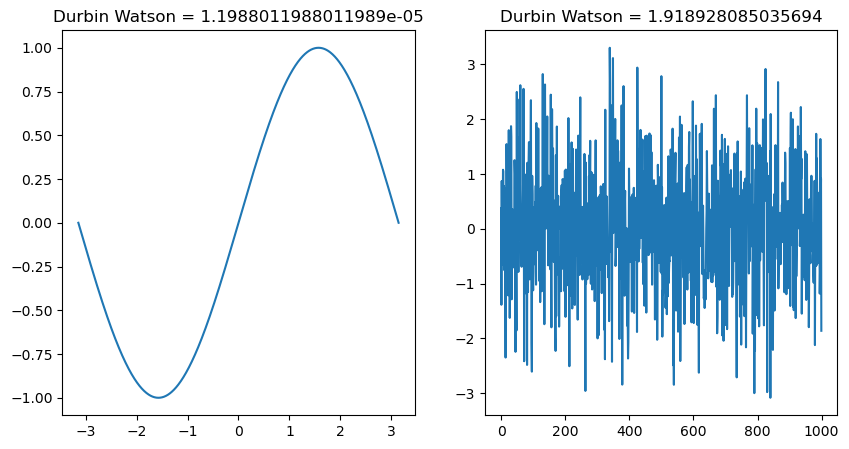

In [19]:
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import numpy as np
mu, sigma = 0, 1.1
independent_samples = np.random.normal(mu, sigma, 1000)
correlated_samples = np.linspace(-np.pi, np.pi, num=1000)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(correlated_samples, np.sin(correlated_samples))
ax[0].set_title('Durbin Watson = {}'.format(durbin_watson(correlated_samples)))
ax[1].plot(independent_samples)
ax[1].set_title('Durbin Watson = {}'.format(durbin_watson(independent_samples)))

## Testing for equal variance
#### When testing for equal variance among distributions, we have two prominent tests: Levene’s test for equality of variances and Fisher’s F-test.

## Levene’s test for equality of variances

#### Levene’s test for equality of variances is useful when testing for homogeneity of variance of two or more groups. In the code snippet shown below Figure 4.8, we test with three distributions, each having a sample size of 100, a mean of 0, and standard deviations of 0.9, 1.1, and 2. Figure 4.8 is a plot of the three distributions generated using the data output from the code above Figure 4.8.